(0, 0, 16, 20)
(0.125, 0.7126086956521739, 0.47727272727272724, 0.88)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(-0.4, 0, 0.4, 381)
(0.0, 0.0, 1.0, 1.0)
(0.6, 0, 1.4, 372)
(0.0, 0.0, 1.0, 1.0)
(1.6, 0, 2.4000000000000004, 332)
(0.0, 0.0, 1.0, 1.0)
(2.6, 0, 3.4000000000000004, 322)
(0.0, 0.0, 1.0, 1.0)
(3.6, 0, 4.4, 295)
(0.0, 0.0, 1.0, 1.0)
(4.6, 0, 5.3999999999999995, 287)
(0.0, 0.0, 1.0, 1.0)
(5.6, 0, 6.3999999999999995, 276)
(0.0, 0.0, 1.0, 1.0)
(6.6, 0, 7.3999999999999995, 276)
(0.0, 0.0, 1.0, 1.0)
(7.6, 0, 8.4, 232)
(0.0, 0.0, 1.0, 1.0)
(8.6, 0, 9.4, 165)
(0.0, 0.0, 1.0, 1.0)
(9.6, 0, 10.4, 147)
(0.0, 0.0, 1.0, 1.0)
(10.6, 0, 11.4, 137)
(0.0, 0.0, 1.0, 1.0)
(11.6, 0, 12.4, 134)
(0.0, 0.0, 1.0, 1.0)
(12.6, 0, 13.4, 124)
(0.0, 0.0, 1.0, 1.0)
(13.6, 0, 14.4, 95)
(0.0, 0.0, 1.0, 1.0)
(14.6, 0, 15.4,

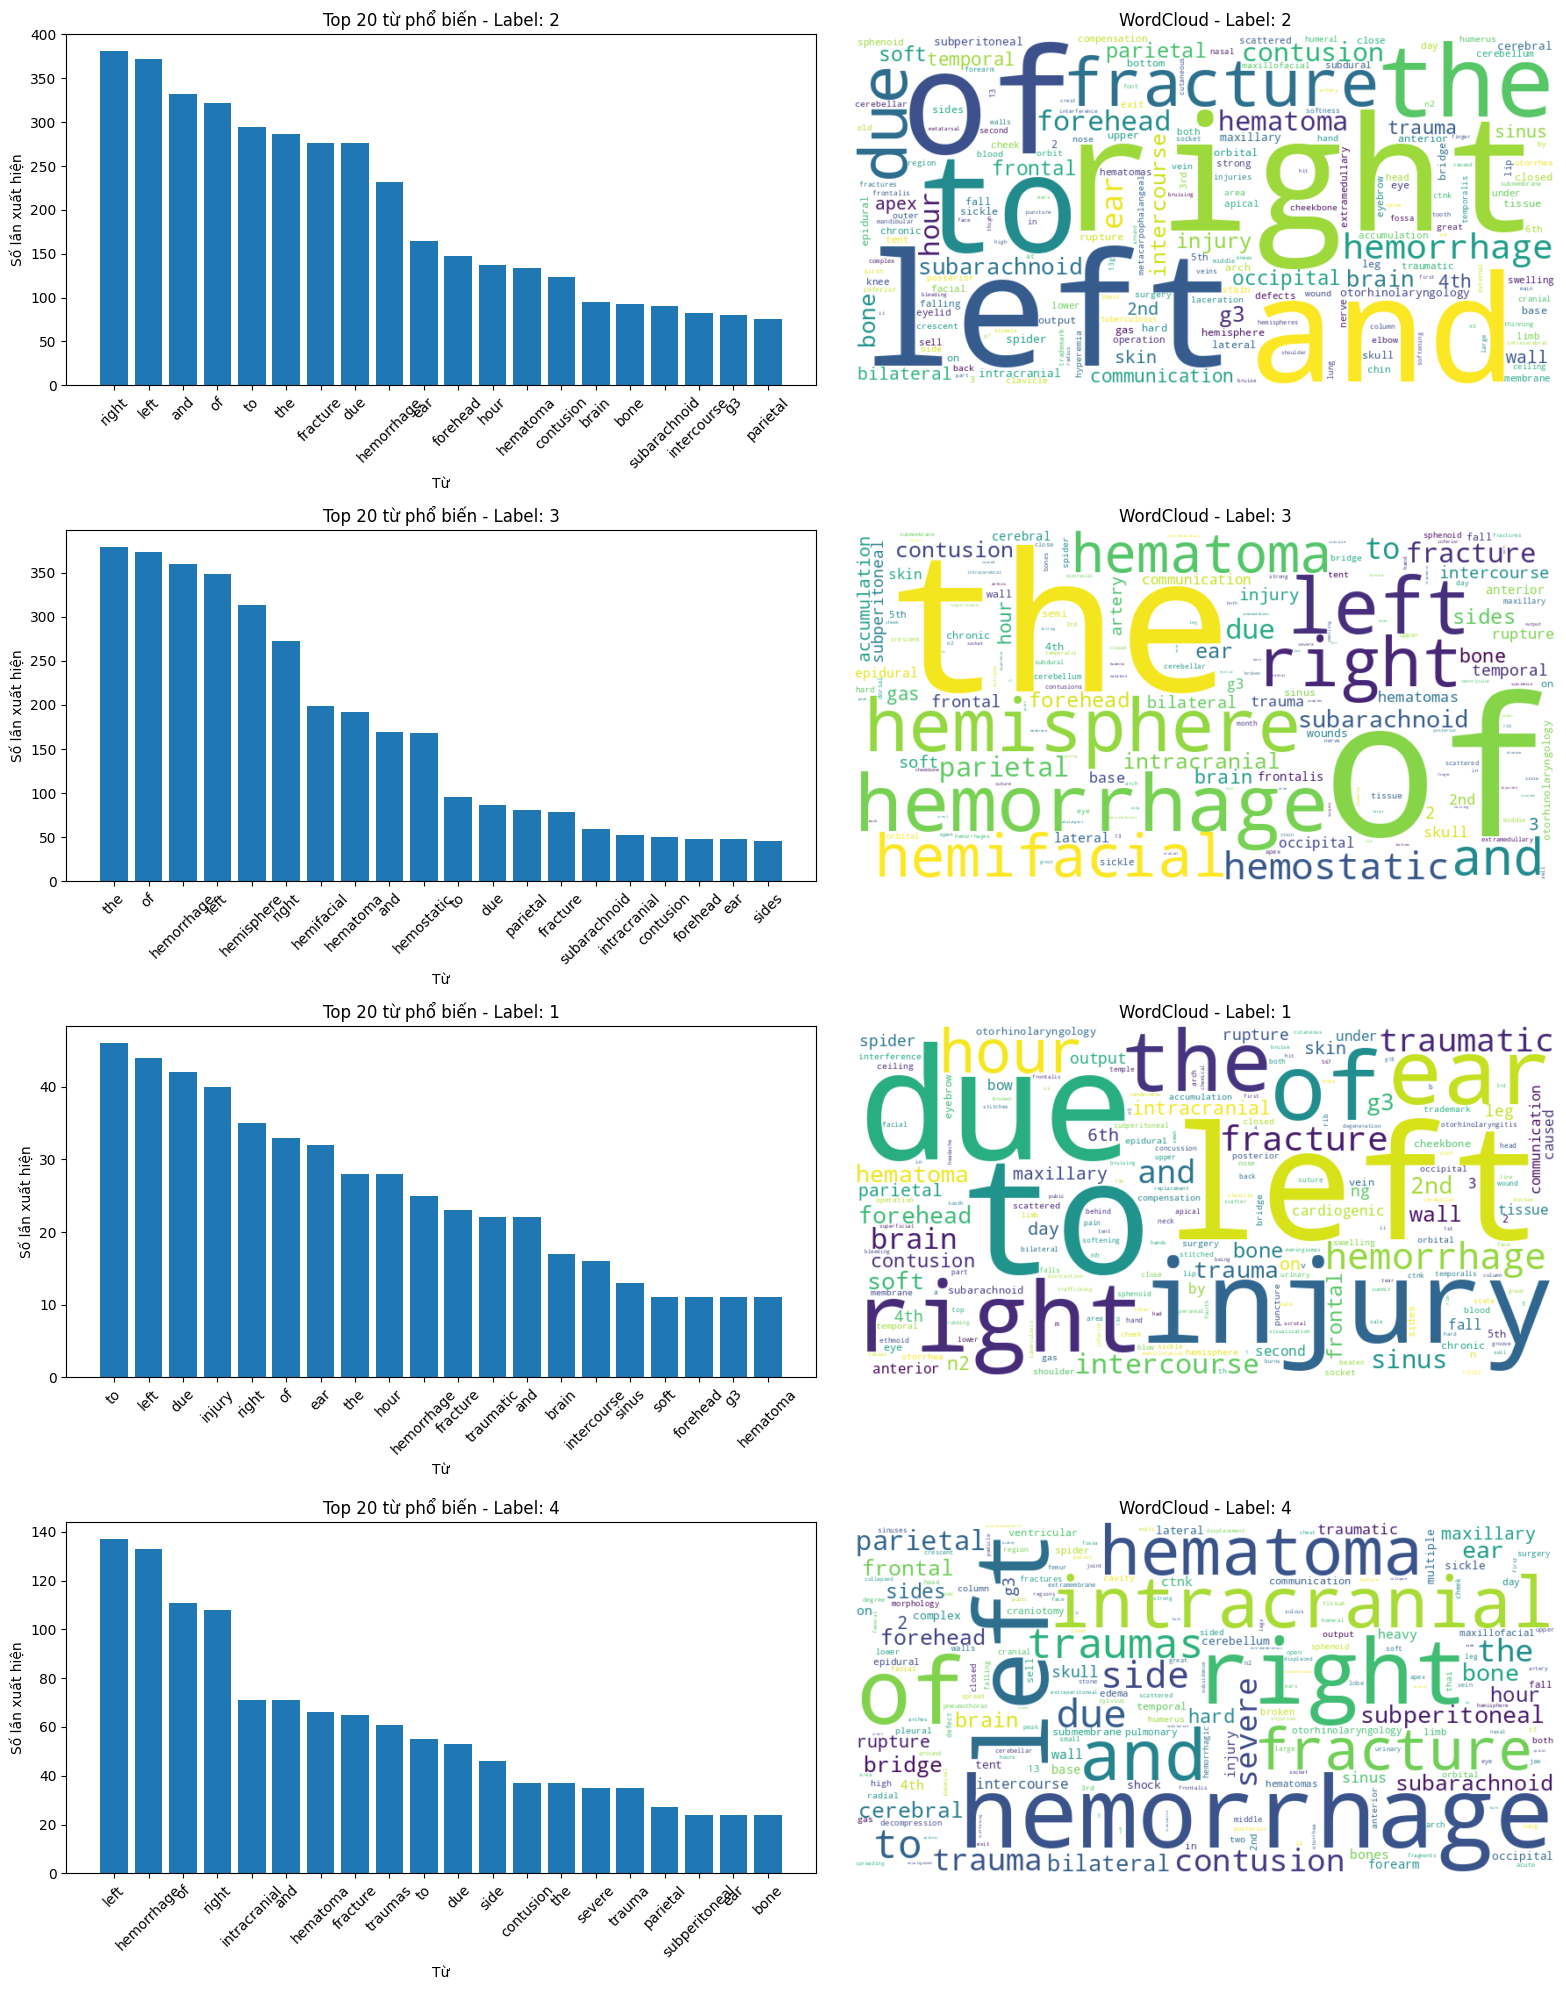

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# Đọc file CSV
file_path = "/home/khanhhiep/Code/Khanh/Khiem/MyBachelorThesis/dataset/raw/merged_dataset.csv"
df = pd.read_csv(file_path)

# Xử lý dữ liệu: lấy 2 cột text và d_target, bỏ dòng thiếu text hoặc label
df = df[['text', 'd_target']].dropna()
df['text'] = df['text'].astype(str)

# Hàm tiền xử lý text: chuyển về lowercase, loại bỏ ký tự đặc biệt
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    return text

df['clean_text'] = df['text'].apply(preprocess_text)

# Lấy danh sách các label duy nhất
labels = df['d_target'].unique()

# Chuẩn bị plot
plt.figure(figsize=(16, 5 * len(labels)))

for i, label in enumerate(labels):
    # Lọc dữ liệu theo label
    texts = df[df['d_target'] == label]['clean_text'].tolist()

    # Gộp tất cả text thành chuỗi
    all_text = " ".join(texts)

    # Tách từ
    words = all_text.split()

    # Đếm tần suất từ
    word_counts = Counter(words)

    # Lấy top 20 từ phổ biến
    top_words = word_counts.most_common(20)
    words_, counts_ = zip(*top_words) if top_words else ([], [])

    # Vẽ biểu đồ cột
    plt.subplot(len(labels), 2, i*2 + 1)
    plt.bar(words_, counts_)
    plt.xticks(rotation=45)
    plt.title(f"Top 20 từ phổ biến - Label: {label}")
    plt.xlabel("Từ")
    plt.ylabel("Số lần xuất hiện")

    # Vẽ WordCloud
    plt.subplot(len(labels), 2, i*2 + 2)
    if word_counts:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
        plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - Label: {label}")

plt.tight_layout()
plt.show()
